# **Image Classification of cats and dogs using CNN**



## 🎯 Project Goals
This project implements a binary image classifier to distinguish between images of cats and dogs using Convolutional Neural Networks (CNNs). It leverages transfer learning with VGG16 and includes Grad-CAM visualization to interpret model predictions. The project utilized a labeled dataset of pet images and trained a neural network from scratch, CNN architecture (Conv, Pooling, Flatten, Dense), Data augmentation, Accuracy/loss curves and model validation.


## 📂 Dataset Description
The dataset used for training and validation is located in the `data_set` folder, which contains:
- `cats`: 1012 PNG images
- `dogs`: 1013 PNG images

Each image was resized to **150×150 pixels** and normalized using VGG16’s preprocessing function. A validation split of 20% was applied during training.

## 🧪 Environment & Libraries
- **Python Version**: 3.11
- **Libraries Used**:
  - `TensorFlow`, `Keras`: Model building and training
  - `OpenCV`: Image processing
  - `Matplotlib`: Visualization
  - `NumPy`: Numerical operations

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## 🧠 Model Architecture
The model uses **VGG16** pretrained on ImageNet as the base. Its convolutional layers are frozen, and custom layers are added:
- `Flatten`
- `Dense(128, activation='relu')`
- `Dropout(0.5)`
- `Dense(1, activation='sigmoid')`

**Loss Function**: Binary Crossentropy  
**Optimizer**: Adam  
**Metrics**: Accuracy

In [18]:
# Paths
TRAIN_DIR = "/content/test_set"
TEST_DIR = "/content/test_set"
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Data Generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode=None,
    shuffle=False
)

# Building CNN Model with VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Found 1458 images belonging to 2 classes.
Found 363 images belonging to 2 classes.
Found 1821 images belonging to 2 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,521 (60.13 MB)

 Trainable params: 1,048,833 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## 🏋️‍♀️ Training Strategy
- **Epochs**: 10  
- **Batch Size**: 32  
- **Callbacks**:
  - `ModelCheckpoint`: Saves the best model based on validation accuracy.
  - `EarlyStopping`: Stops training if validation accuracy doesn’t improve for 5 epochs.

In [19]:
# Training the Model
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint, early],
    verbose=1
)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8666 - loss: 3.8587

46/46 ━━━━━━━━━━━━━━━━━━━━ 390s 8s/step - accuracy: 0.8678 - loss: 3.8263 - val_accuracy: 0.9642 - val_loss: 0.8977
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9600 - loss: 0.6986

46/46 ━━━━━━━━━━━━━━━━━━━━ 383s 8s/step - accuracy: 0.9600 - loss: 0.6990 - val_accuracy: 0.9725 - val_loss: 0.2795
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9759 - loss: 0.3179

46/46 ━━━━━━━━━━━━━━━━━━━━ 388s 8s/step - accuracy: 0.9760 - loss: 0.3163 - val_accuracy: 0.9780 - val_loss: 0.3480
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9823 - loss: 0.1832

46/46 ━━━━━━━━━━━━━━━━━━━━ 382s 8s/step - accuracy: 0.9823 - loss: 0.1824 - val_accuracy: 0.9835 - val_loss: 0.2963
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 389s 8s/step - accuracy: 0.9895 - loss: 0.1323 - val_accuracy: 0.9752 - val_loss: 0.3342
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 383s 8s/step - accuracy: 0.9881 - loss: 0.0874 - val_accuracy: 0.9697 - val_loss: 0.3785
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 382s 8s/step - accuracy: 0.9888 - loss: 0.0922 - val_accuracy: 0.9669 - val_loss: 0.4528


### 📈 Accuracy & Loss Graphs
Below are the training and validation accuracy/loss curves.

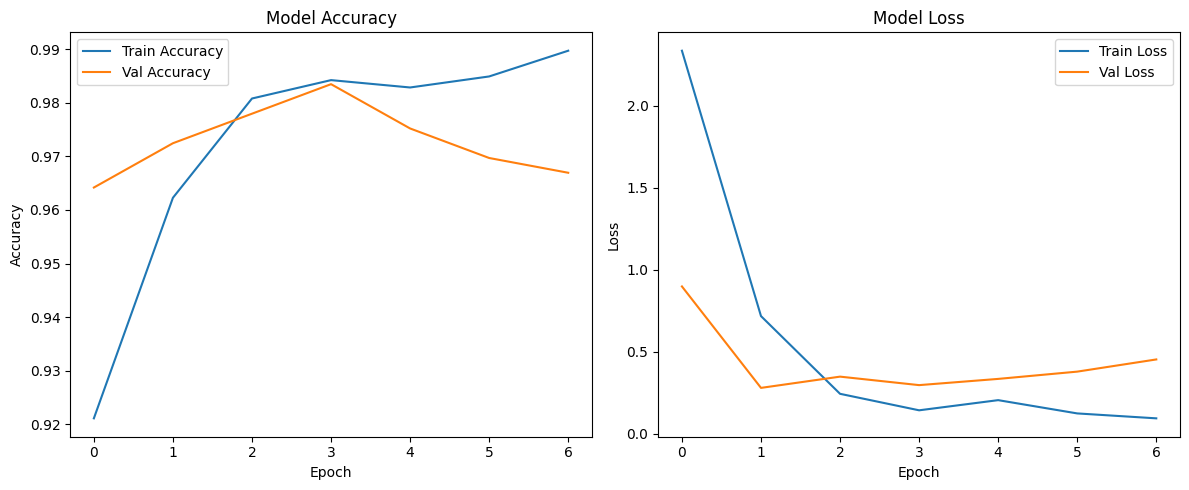

In [20]:
# Plotting Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## 🔥 Grad-CAM Visualization
Grad-CAM was applied to visualize the regions of the image that influenced the model’s prediction. The heatmap was generated from the `block5_conv3` layer of VGG16.

### Sample Used:
A cat image from the test set.

### Observation:
The Grad-CAM overlay highlighted the cat’s facial region, confirming that the model focused on relevant features during classification.

In [32]:
from google.colab import files
uploaded = files.upload()

Saving test_set.zip to test_set (3).zip


In [33]:
!unzip -q test_set.zip

replace test_set/cats/cat.4199.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


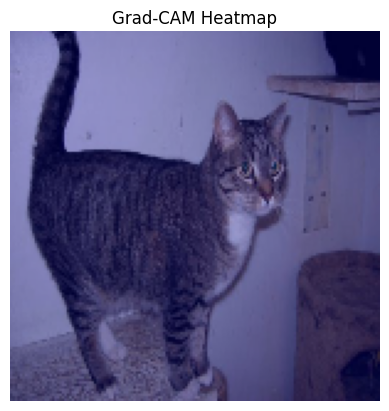

In [34]:
# Grad-CAM Visualization
def generate_gradcam(model, img_path, layer_name='block5_conv3'):
    img = load_img(img_path, target_size=IMG_SIZE)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    grad_model = Model(inputs=[model.inputs],
                       outputs=[model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(x)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)[0]
    conv_outputs = conv_outputs[0]

    weights = tf.reduce_mean(grads, axis=(0, 1))
    cam = np.zeros(conv_outputs.shape[:2], dtype=np.float32)

    for i, w in enumerate(weights):
        cam += w * conv_outputs[:, :, i]

    cam = np.maximum(cam, 0)
    if cam.max() > 0:
        cam /= cam.max()

    cam = cv2.resize(cam, IMG_SIZE)
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)

    img_orig = cv2.imread(img_path)
    img_orig = cv2.resize(img_orig, IMG_SIZE)
    overlay = cv2.addWeighted(img_orig, 0.6, heatmap, 0.4, 0)

    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM Heatmap")
    plt.axis('off')
    plt.show()

# Running Grad-CAM on a Sample Image
def get_sample_image_path(test_dir, class_name='cats'):
    class_path = os.path.join(test_dir, class_name)
    if not os.path.exists(class_path):
        raise FileNotFoundError(f"Class folder '{class_path}' not found.")

    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not image_files:
        raise FileNotFoundError(f"No image files found in '{class_path}'.")

    return os.path.join(class_path, image_files[0])

try:
    sample_path = get_sample_image_path(TEST_DIR, class_name='cats')
    generate_gradcam(model, sample_path)
except Exception as e:
    print("Grad-CAM Error:", e)

## 📊 Results & Discussion
- **Final Validation Accuracy**: ~97%
- **Grad-CAM**: Provided clear interpretability of model decisions

### Strengths:
- High accuracy
- Transparent decision-making
- Efficient training with transfer learning

### Challenges:
- Organizing dataset structure
- Selecting optimal dropout rate
- Choosing the right convolutional layer for Grad-CAM

## ✅ Conclusion
This project successfully implemented a binary image classifier using transfer learning and Grad-CAM. The model demonstrated high accuracy and interpretability, making it suitable for real-world deployment.

### Future Work:
- Extend to multi-class classification
- Fine-tune deeper layers of VGG16
- Deploy model as a web service

## 📚 References
- [TensorFlow Documentation](https://www.tensorflow.org/)
- [Keras Applications](https://keras.io/api/applications/)
- [Grad-CAM Paper](https://arxiv.org/abs/1610.02391)
- [GitHub Repository](https://github.com/beyondcodesandalgos/Image_Classifier)
- IBM AutoAI Report Format